<a href="https://colab.research.google.com/github/dashatrue/g_colab/blob/main/MO_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
url = '/content/drive/MyDrive/Colab Notebooks/Employee.csv'
data = pd.read_csv(url, header=0, na_values='?', delimiter=',')
data.shape

(4653, 9)

In [ ]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

['Education', 'City', 'Gender', 'EverBenched']
['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain', 'LeaveOrNot']


In [ ]:
for c in categorical_columns:
    print (data[c].unique())

['Bachelors' 'Masters' 'PHD']
['Bangalore' 'Pune' 'New Delhi']
['Male' 'Female']
['No' 'Yes']


In [ ]:
#Выделим бинарные и небинарные признаки
data_describe = data.describe(include=[object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print (binary_columns)
print (nonbinary_columns)

['Gender', 'EverBenched']
['Education', 'City']


In [ ]:
# Заменим бинарные признаки на 0 и 1
for c in binary_columns:
    top = data_describe[c]['top']
    top_items = data[c] == top
    data.loc[top_items, c] = 0
    data.loc[np.logical_not(top_items), c] = 1

In [ ]:
# Метод векторизации для небинарных признаков
data_nonbinary = pd.get_dummies(data[nonbinary_columns])

# Нормализация числовых данных
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()

# Объединение данных
data_processed = pd.concat([data_nonbinary, data_numerical], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Преобразуем нужные столбцы
data['Education'] = label_encoder.fit_transform(data['Education'])
data['City'] = label_encoder.fit_transform(data['City'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['EverBenched'] = label_encoder.fit_transform(data['EverBenched'])

In [ ]:
y = data['LeaveOrNot']
X = data_processed
feature_names = X.columns

print(feature_names)
print(X.shape)
print(y.shape)

N, d = X.shape

Index(['Education_Bachelors', 'Education_Masters', 'Education_PHD',
       'City_Bangalore', 'City_New Delhi', 'City_Pune', 'JoiningYear',
       'PaymentTier', 'Age', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')
(4653, 11)
(4653,)


In [ ]:
#Разбиение данных на обучающую/тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape
print (N_train, N_test)

3257 1396


In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
"""а) поиск по сетке с использованием
пакета scikit-learn"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

rf = RandomForestClassifier()

grid_space = {
    'max_depth': [2, 3],
    'n_estimators': [10, 30],
    'max_features': [1, 2],
    'min_samples_leaf': [2, 4],
    'min_samples_split': [4]
}

grid = GridSearchCV(rf,param_grid=grid_space,cv=5,scoring='accuracy', n_jobs=-1)
model_grid = grid.fit(X, y)

print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

# Прогнозирование на тестовых данных
y_pred = model_grid.predict(X_test)

# Оценка модели с использованием classification_report
print(classification_report(y_test, y_pred))

Best hyperparameters are: {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 30}
Best score is: 0.9924812030075187
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       913
           1       1.00      0.97      0.99       483

    accuracy                           0.99      1396
   macro avg       0.99      0.99      0.99      1396
weighted avg       0.99      0.99      0.99      1396



In [ ]:
pip install h2o

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 4.1 MB/s eta 0:00:00


In [ ]:
"""б) оптимизация гиперпараметров и выбор модели с помощью
H2O AutoML"""
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 14 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,29 days
H2O_cluster_name:,H2O_from_python_unknownUser_nd96ct
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.793 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
hf = h2o.H2OFrame(data)

# Сделаем целевую переменную фактором (для классификации)
hf['LeaveOrNot'] = hf['LeaveOrNot'].asfactor()

# train/test split
train, test = hf.split_frame(ratios=[0.7], seed=11)

x = hf.columns
y = 'LeaveOrNot'
x.remove(y)

# Обучение
aml = H2OAutoML(max_models=5, seed=1)
aml.train(x=x, y=y, training_frame=train)

# Предсказание
preds = aml.leader.predict(test)
print(preds.head())

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
07:46:51.489: _train param, Dropping bad and constant columns: [EverBenched, Gender]

█
07:46:55.242: _train param, Dropping bad and constant columns: [EverBenched, Gender]


07:46:56.198: _train param, Dropping bad and constant columns: [EverBenched, Gender]

███
07:47:00.253: _train param, Dropping bad and constant columns: [EverBenched, Gender]

█
07:47:02.603: _train param, Dropping bad and constant columns: [EverBenched, Gender]

██
07:47:06.671: _train param, Dropping unused columns: [EverBenched, Gender]

███
07:47:11.668: _train param, Dropping unused columns: [EverBenched, Gender]

█████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
  predict        p0         p1
        0  0.780327  0.219673
        0  0.905961  0.0940386
        1  0.205133  0.794867
    

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


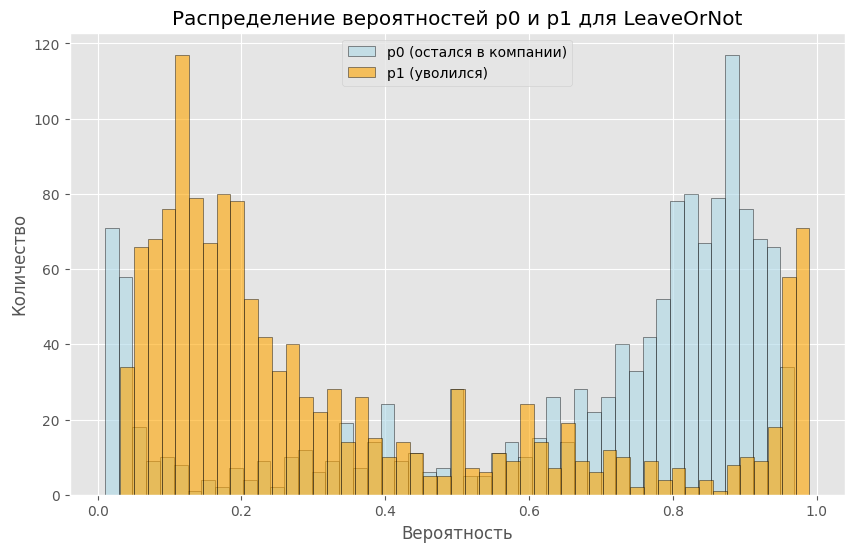

In [ ]:
preds_pd = preds.as_data_frame()

plt.figure(figsize=(10, 6))
plt.hist(preds_pd['p0'], bins=50, alpha=0.6, label='p0 (остался в компании)', color='lightblue', edgecolor='black')
plt.hist(preds_pd['p1'], bins=50, alpha=0.6, label='p1 (уволился)', color='orange', edgecolor='black')

plt.title('Распределение вероятностей p0 и p1 для LeaveOrNot')
plt.xlabel('Вероятность')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# МНОГОКЛАССОВАЯ КЛАССИФИКАЦИЯ
def classify_age(age):
    if age < 30:
        return 0  # Молодые
    elif 30 <= age < 40:
        return 1  # Средний возраст
    else:
        return 2  # Старший возраст

# Применяем функцию для создания новой целевой переменной
data['age_group'] = data['Age'].apply(classify_age)

In [ ]:
X = data.drop(columns=['LeaveOrNot', 'age_group'])  # Признаки
y = data['age_group']  # Целевая переменная (группы по возрасту)

# Разделяем на обучающую и тестовую выборки
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Проверяем размеры
print(X_train_multiclass.shape[0])
print(X_test_multiclass.shape[0])

3722
931


In [ ]:
"""а) поиск по сетке с использованием
пакета scikit-learn"""
rf = RandomForestClassifier(random_state=42)

grid_space = {
    'max_depth': [2, 3],
    'n_estimators': [10, 30],
    'max_features': [1, 2],
    'min_samples_leaf': [2, 4],
    'min_samples_split': [4]
}

grid = GridSearchCV(
    rf,
    param_grid=grid_space,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

model_grid = grid.fit(X_train_multiclass, y_train_multiclass)

print('Best hyperparameters are: ' + str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

y_pred_multiclass = model_grid.predict(X_test_multiclass)

# Оценка модели
print(classification_report(y_test_multiclass, y_pred_multiclass))

Best hyperparameters are: {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 10}
Best score is: 0.9535198816482644
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       606
           1       0.87      1.00      0.93       282
           2       0.00      0.00      0.00        43

    accuracy                           0.95       931
   macro avg       0.62      0.67      0.64       931
weighted avg       0.91      0.95      0.93       931



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
"""б) оптимизация гиперпараметров и выбор модели с помощью
H2O AutoML"""

# Загрузка данных в H2O
hf = h2o.H2OFrame(data)

# Преобразуем целевую переменную в фактор для многоклассовой классификации
hf['age_group'] = hf['age_group'].asfactor()

# Разделение на обучающую и тестовую выборки
train, test = hf.split_frame(ratios=[0.8], seed=42)

# Определяем признаки и целевую переменную
x = hf.columns
y = 'age_group'
x.remove(y)

print(f"Признаки: {x}")
print(f"Целевая переменная: {y}")

# Обучаем модель с помощью AutoML
aml = H2OAutoML(max_models=5, seed=42, balance_classes=True)
aml.train(x=x, y=y, training_frame=train)

# Получаем лучшую модель
leader_model = aml.leader

# Предсказания на тестовой выборке
preds = leader_model.predict(test)
print(preds.head())

# Оценка производительности
perf = leader_model.model_performance(test_data=test)
conf_matrix = perf.confusion_matrix()

# Выводим таблицу
conf_table = conf_matrix.as_data_frame()
print(conf_table)

# Функция для извлечения чисел из формата '123 / 456'
def extract_int(val):
    return int(val.split('/')[0].strip()) if isinstance(val, str) and '/' in val else int(val)

# Подсчёт количества правильных и всех предсказаний
correct_preds = sum([extract_int(conf_matrix.cell_values[i][i]) for i in range(len(conf_matrix.cell_values))])
total_preds = sum([sum([extract_int(v) for v in row]) for row in conf_matrix.cell_values])

# Метрики
accuracy = correct_preds / total_preds
logloss = perf.logloss()

print(f"\nAccuracy: {accuracy:.4f}")
print(f"LogLoss: {logloss:.4f}")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Признаки: ['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot']
Целевая переменная: age_group
AutoML progress: |
09:01:02.588: _train param, Dropping bad and constant columns: [EverBenched, Gender]

█
09:01:06.200: _train param, Dropping bad and constant columns: [EverBenched, Gender]

███████████
09:01:15.695: _train param, Dropping bad and constant columns: [EverBenched, Gender]

█████
09:03:33.597: _train param, Dropping bad and constant columns: [EverBenched, Gender]

█
09:03:35.423: _train param, Dropping bad and constant columns: [EverBenched, Gender]

█
09:03:41.868: _train param, Dropping unused columns: [EverBenched, Gender]

███████
09:04:28.746: _train param, Dropping unused columns: [EverBenched, Gender]

█████████████████████████████████████| (done) 100%
glm prediction progress: |████████████████████████████